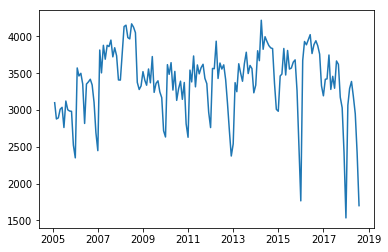

In [20]:
%matplotlib inline

import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
from matplotlib.pylab import rcParams

#Workflow parameters
param_boxcox = True
param_decompose = 1

#Read
dat = pd.ExcelFile('Base_Accidentes.xlsx')
dat = dat.parse('DATA2005')

#Set ts
ind = pd.date_range(start='1/1/2005', end='8/1/2018', freq='M')
dat = dat.set_index(ind)
dat = dat.drop(['PERIODO','MES'], axis=1)
myts = dat['HER']
plt.plot(myts)

# Aplicando tranformaciones Box-Cox para estabilizar la varianza.

In [21]:
import scipy as sp
import scipy.stats
import math
sp.stats.boxcox(myts, alpha=0.05) #Intervalo de confianza para lambda

(array([  3.75951894e+10,   2.97297522e+10,   3.02241497e+10,
          3.42753299e+10,   3.52234993e+10,   2.60918271e+10,
          3.84875977e+10,   3.40230730e+10,   3.34157476e+10,
          3.32739344e+10,   1.95547020e+10,   1.56075765e+10,
          5.90004131e+10,   5.34753905e+10,   5.52591170e+10,
          4.83155708e+10,   2.77761964e+10,   4.82698819e+10,
          4.96069185e+10,   5.13016954e+10,   4.77239204e+10,
          3.77493620e+10,   2.40226799e+10,   1.77686209e+10,
          7.27614654e+10,   5.55603118e+10,   7.67041585e+10,
          6.54652224e+10,   7.67041585e+10,   7.56429638e+10,
          8.12465258e+10,   6.72829508e+10,   7.46534178e+10,
          6.81467851e+10,   5.08743423e+10,   5.07797071e+10,
          7.03099927e+10,   9.38694014e+10,   9.52446967e+10,
          8.34855502e+10,   8.22949925e+10,   9.65602768e+10,
          9.32944211e+10,   8.80207583e+10,   4.93282357e+10,
          4.49703328e+10,   4.70923280e+10,   5.64197995e+10,
        

Text(0,0.5,'mytsbc')

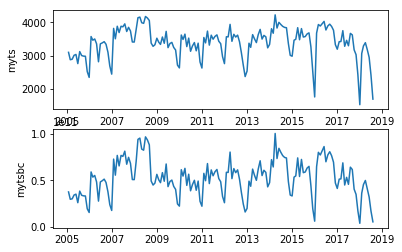

In [22]:
oldts = myts
myts = sp.stats.boxcox(myts, lmbda=3.1726891131745796) 
myts = pd.DataFrame(myts).set_index(ind)

plt.subplot(2, 1, 1)
plt.plot(oldts)
plt.ylabel('myts')
plt.subplot(2, 1, 2)
plt.plot(myts)
plt.ylabel('mytsbc') 

# Descomposición de la serie de tiempo

/home/user/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


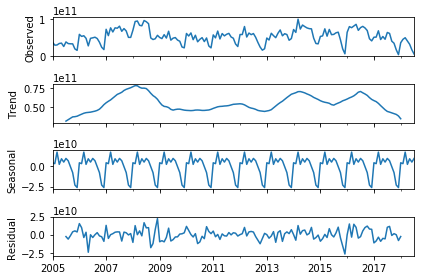

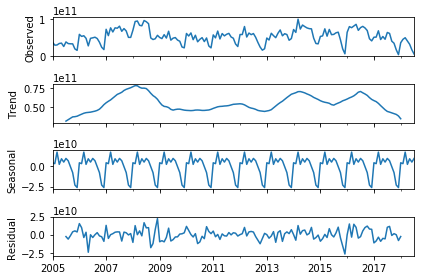

In [23]:
#Descomposición usando promedios Móviles
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(myts, model='additive')
result.plot()

# Descomposición de la serie de tiempo

In [32]:
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
data = pd.read_csv('AirPassengers.csv')

######Convertir el conjunto de datos en una serie de Tiempo#####
data['Month']=pd.to_datetime(data['Month'])
pasajeros=data.set_index('Month')
#convert to time series:
ts = pasajeros['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

Text(0.5,1,'AirPassengers')

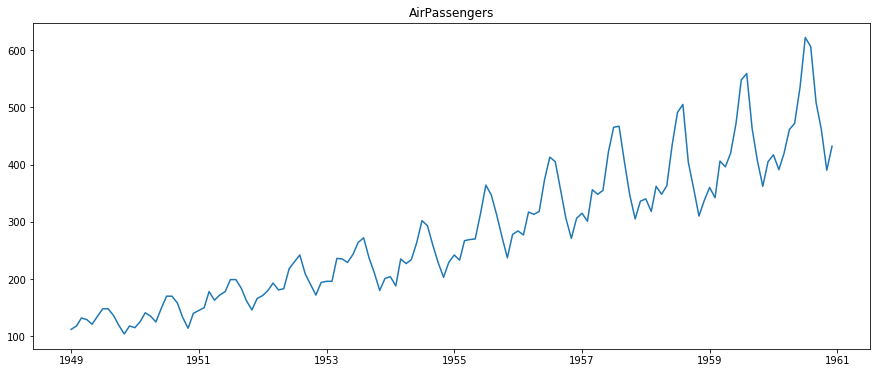

In [33]:
####Graficar la Serie#####
plt.plot(ts)
plt.title('AirPassengers') 

Importante conocer la periodicidad de la serie. Es parámetro para los métodos

# Descomposición usando promedios Móviles
no permite hacer pronósticos  
Descomposición no paramétrica

Considere que tenemos una serie de tiempo observada $\{x_{t}\}$ tal que se puede descomponer de la forma
$$x_{t}=m_{t}+s_{t}+y_{t}$$
donde $m_{t}:$ es la componente de tendencia,
<br>
      $s_{t}:$ es la componente estacional($s_{t-d}=s_{t}$),
<br>      
      $y_{t}:$ es unas serie de tiempo estacionaria. 
<br>
Vamos a usar el filtro de promedio móviles para estimar la tendencia de la siguiente manera:
<br>
$W_{t}=(2q+1)^{-1}\sum_{j=-q}^{q}x_{t-j}$, el cual se puede verificar que $W_{t}\approx m_{t}$.
<br>
Por lo tanto $$\widehat{m}_{t}=(2q+1)^{-1}\sum_{j=-q}^{q}x_{t-j}\  \  \ q+1\leq t \leq n-q.$$
<br>
Para estimar la componente estacional $s_{t}$, asumimos que es el periodo es d, y para cada $k=1,\cdots,d$ se computa el promedio $w_{k}$ de las desviaciones $\{ (x_{k+jd}-\widehat{m}_{k+jd}),q<k+jd<n-q\}$.
<br>
Se estima la componente estacional $s_{k}$ como
$$\widehat{s}_{k}=w_{k}-d^{-1}\sum_{i=1}^{d}w_{i}\   \   \ k=1,\cdots,d$$ y
$$\widehat{s}_{k}=\widehat{s}_{k-d}\   \   \ k>d.$$


In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts, model='additive')

In [20]:
result.trend

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
1949-11-01    129.000000
1949-12-01    129.750000
1950-01-01    131.250000
1950-02-01    133.083333
1950-03-01    134.916667
1950-04-01    136.416667
1950-05-01    137.416667
1950-06-01    138.750000
1950-07-01    140.916667
1950-08-01    143.166667
1950-09-01    145.708333
1950-10-01    148.416667
1950-11-01    151.541667
1950-12-01    154.708333
1951-01-01    157.125000
1951-02-01    159.541667
1951-03-01    161.833333
1951-04-01    164.125000
1951-05-01    166.666667
1951-06-01    169.083333
                 ...    
1958-07-01    381.833333
1958-08-01    383.666667
1958-09-01    386.500000
1958-10-01    390.333333
1958-11-01    394.708333
1958-12-01    398.625000
1959-01-01    402.541667
1959-02-01    407.166667
1959-03-01    411.8

In [21]:
result.seasonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
1949-06-01    35.402778
1949-07-01    63.830808
1949-08-01    62.823232
1949-09-01    16.520202
1949-10-01   -20.642677
1949-11-01   -53.593434
1949-12-01   -28.619949
1950-01-01   -24.748737
1950-02-01   -36.188131
1950-03-01    -2.241162
1950-04-01    -8.036616
1950-05-01    -4.506313
1950-06-01    35.402778
1950-07-01    63.830808
1950-08-01    62.823232
1950-09-01    16.520202
1950-10-01   -20.642677
1950-11-01   -53.593434
1950-12-01   -28.619949
1951-01-01   -24.748737
1951-02-01   -36.188131
1951-03-01    -2.241162
1951-04-01    -8.036616
1951-05-01    -4.506313
1951-06-01    35.402778
                ...    
1958-07-01    63.830808
1958-08-01    62.823232
1958-09-01    16.520202
1958-10-01   -20.642677
1958-11-01   -53.593434
1958-12-01   -28.619949
1959-01-01   -24.748737
1959-02-01   -36.188131
1959-03-01    -2.241162
1959-04-01    -8.036616
1959-05-01

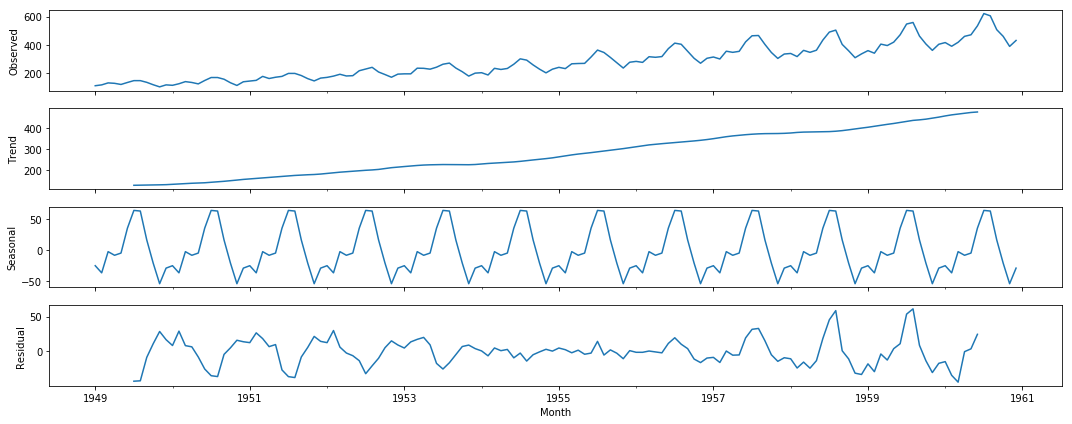

In [25]:
result.plot()
pyplot.show()

# Descomposición usando suavizamiento exponencial(Holter-Winters )
permite hacer pronósticos  
Descomposición paramétrica

Consideremos de nuevo que la serie que hemos observado es $x_{t}$ y tiene periodo $d$. Entonces la predicción $\widehat{x}_{t+h|t}$ viene dada por
$$\widehat{x}_{t+h|t}=a_{t}+hb_{t}+s_{t+h-d}$$
donde
$$
\begin{align*}
a_{t}&=\alpha(x_{t}-s_{t-d})+(1-\alpha)(a_{t-1}+b_{t-1})\\
b_{t}&=\beta(a_{t}-a_{t-1})+(1-\beta)b_{t-1}\\
s_{t}&=\gamma(x_{t}-a_{t})+(1-\gamma)s_{t-p}
\end{align*}
$$
y la estimación de $\alpha,\beta,\gamma$ se hace minimizando la suma de los cuadrados de los errores de predicción un paso adelante $e_{t}=x_{t}-\widehat{x}_{t+1|t}$.



In [29]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
print(ts)
print(pd.infer_freq(data['Month'], warn=True))
fit1 = ExponentialSmoothing(ts, seasonal_periods=12, trend='add', seasonal='add').fit(use_boxcox=True)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
1951-01-01    145
1951-02-01    150
1951-03-01    178
1951-04-01    163
1951-05-01    172
1951-06-01    178
             ... 
1958-07-01    491
1958-08-01    505
1958-09-01    404
1958-10-01    359
1958-11-01    310
1958-12-01    337
1959-01-01    360
1959-02-01    342
1959-03-01    406
1959-04-01    396
1959-05-01    420
1959-06-01    472
1959-07-01    548
1959-08-01    559
1959-09-01    463
1959-10-01    407
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


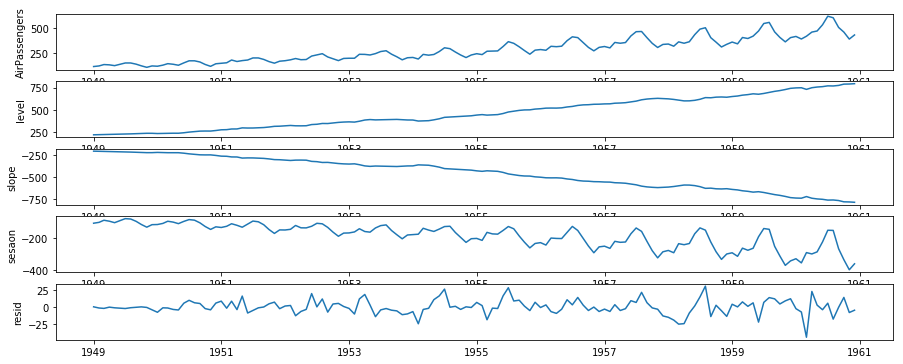

In [30]:
plt.subplot(5, 1, 1)
plt.plot(ts)
plt.ylabel('AirPassengers') 
plt.subplot(5, 1, 2)
plt.plot(fit1.level)
plt.ylabel('level') 
plt.subplot(5, 1, 3)
plt.plot(fit1.slope)
plt.ylabel('slope') 
plt.subplot(5, 1, 4)
plt.plot(fit1.season)
plt.ylabel('sesaon') 
plt.subplot(5, 1, 5)
plt.plot(fit1.resid)
plt.ylabel('resid') 
pyplot.show()

# Eliminación de la tendencia y estacionalidad usando diferenciación
Importante ver que se van perdiendo los primeros datos de la serie a medida que se va aplicando diferenciación.  
Elimina tendencia, estacionaridad, falta heterocedasticidad.

En ocasiones es posible transformar la serie a estacionaria usando diferenciación ordinaria y estacional. Para ésto introduciremos la notación 
del polinomio de rezago o retardo $B$, tal que $BX_{t}=X_{t-1}$,  $B^{k}X_{t}=X_{t-k}$ y $B^{0}X_{t}=X_{t}$.

Por lo general es suficiente una diferenciación ordinaria para eliminar la tendecia, ya sea una tendencia determinística o estocástica. La diferencia ordinaria es definida como
$$\nabla X_{t}=(1-B)X_{t}=X_{t}-X_{t-1}.$$
En general k diferencias ordinarias vienen dadas por
$$\nabla^{k}X_{t}=(1-B)^{k}X_{t}.$$

In [35]:
dts=ts.diff(periods=1)[1:]
print(dts)

Month
1949-02-01      6.0
1949-03-01     14.0
1949-04-01     -3.0
1949-05-01     -8.0
1949-06-01     14.0
1949-07-01     13.0
1949-08-01      0.0
1949-09-01    -12.0
1949-10-01    -17.0
1949-11-01    -15.0
1949-12-01     14.0
1950-01-01     -3.0
1950-02-01     11.0
1950-03-01     15.0
1950-04-01     -6.0
1950-05-01    -10.0
1950-06-01     24.0
1950-07-01     21.0
1950-08-01      0.0
1950-09-01    -12.0
1950-10-01    -25.0
1950-11-01    -19.0
1950-12-01     26.0
1951-01-01      5.0
1951-02-01      5.0
1951-03-01     28.0
1951-04-01    -15.0
1951-05-01      9.0
1951-06-01      6.0
1951-07-01     21.0
              ...  
1958-07-01     56.0
1958-08-01     14.0
1958-09-01   -101.0
1958-10-01    -45.0
1958-11-01    -49.0
1958-12-01     27.0
1959-01-01     23.0
1959-02-01    -18.0
1959-03-01     64.0
1959-04-01    -10.0
1959-05-01     24.0
1959-06-01     52.0
1959-07-01     76.0
1959-08-01     11.0
1959-09-01    -96.0
1959-10-01    -56.0
1959-11-01    -45.0
1959-12-01     43.0
1960-01-01    

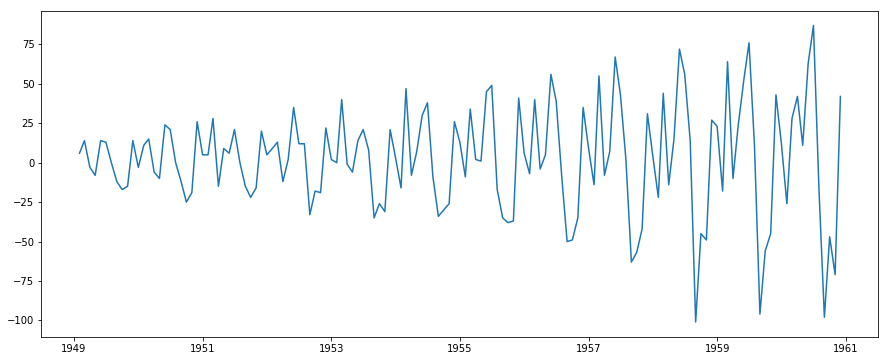

In [36]:
plt.plot(dts)
plt.show()

La diferenciación estacional también puede ser aplicada para eliminar la estacionalidad. Se define la primera diferencia estacional como
$$\nabla_{d}X_{t}=(1-B^{d})X_{t}-X_{t-d}$$
donde $d$ es el periodo de la serie.

In [37]:
Ddts=dts.diff(periods=12)[12:]
print(dts.diff(periods=12)[12:])

Month
1950-02-01     5.0
1950-03-01     1.0
1950-04-01    -3.0
1950-05-01    -2.0
1950-06-01    10.0
1950-07-01     8.0
1950-08-01     0.0
1950-09-01     0.0
1950-10-01    -8.0
1950-11-01    -4.0
1950-12-01    12.0
1951-01-01     8.0
1951-02-01    -6.0
1951-03-01    13.0
1951-04-01    -9.0
1951-05-01    19.0
1951-06-01   -18.0
1951-07-01     0.0
1951-08-01     0.0
1951-09-01    -3.0
1951-10-01     3.0
1951-11-01     3.0
1951-12-01    -6.0
1952-01-01     0.0
1952-02-01     4.0
1952-03-01   -15.0
1952-04-01     3.0
1952-05-01    -7.0
1952-06-01    29.0
1952-07-01    -9.0
              ... 
1958-07-01    13.0
1958-08-01    12.0
1958-09-01   -38.0
1958-10-01    12.0
1958-11-01    -7.0
1958-12-01    -4.0
1959-01-01    19.0
1959-02-01     4.0
1959-03-01    20.0
1959-04-01     4.0
1959-05-01     9.0
1959-06-01   -20.0
1959-07-01    20.0
1959-08-01    -3.0
1959-09-01     5.0
1959-10-01   -11.0
1959-11-01     4.0
1959-12-01    16.0
1960-01-01   -11.0
1960-02-01    -8.0
1960-03-01   -36.0
1960-0

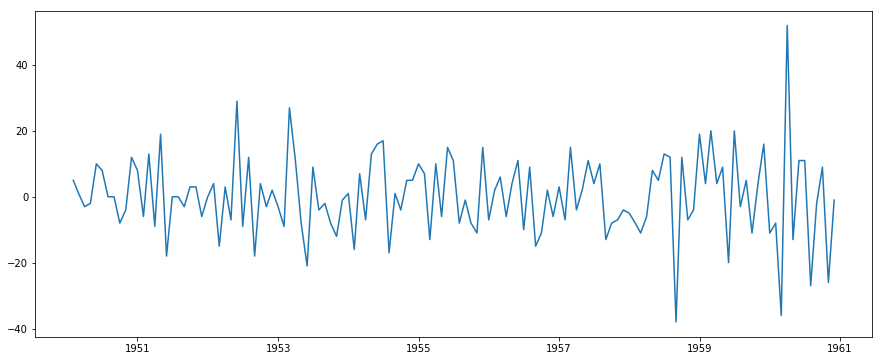

In [38]:
plt.plot(Ddts)
plt.show()

# Aplicando tranformaciones Box-Cox para estabilizar la varianza.
Aplicar a datos originales, no transformados, que no sean negativos

La transformación Box-Cox para una serie $U_{t}\geq0$ consiste en lo siguiente:
$$
	f_{\lambda}(U_{t})=
	\begin{cases}
	\lambda^{-1}(U_{t}^{\lambda}-1), & U_{t}\geq0, \lambda>0\\
	\ln U_{t}, & U_{t}>0, \lambda=0
	\end{cases}
 $$

In [44]:
# sp.stats.boxcox(tsAirP,alpha=0.05)
#sp.stats.boxcox(data['#Passengers'],alpha=0.05)
#logAirp=sp.stats.boxcox(data['#Passengers'],lmbda=0)
import scipy as sp
import math
sp.stats.boxcox(ts,alpha=0.05) #Intervalo de confianza para lambda

(array([ 6.8274885 ,  6.93282065,  7.16188982,  7.11460912,  6.98378526,
         7.20826372,  7.39959616,  7.39959616,  7.22352663,  6.94993029,
         6.67929963,  6.93282065,  6.88073991,  7.06638216,  7.29843673,
         7.20826372,  7.05008902,  7.41371306,  7.69297564,  7.69297564,
         7.53725821,  7.17744667,  6.86312233,  7.28363782,  7.35675232,
         7.42774947,  7.79166105,  7.60332493,  7.71801202,  7.79166105,
         8.03379751,  8.03379751,  7.86322452,  7.59025107,  7.37111683,
         7.64214063,  7.70552501,  7.81574089,  7.96692809,  7.82769544,
         7.85143669,  8.23478308,  8.35415575,  8.46833511,  8.14152234,
         7.94424449,  7.71801202,  7.97819488,  8.00058081,  8.00058081,
         8.4118638 ,  8.40233325,  8.34441333,  8.47763077,  8.66568382,
         8.73398047,  8.42136   ,  8.16253854,  7.81574089,  8.05570573,
         8.08822236,  7.9098367 ,  8.40233325,  8.32481925,  8.39276809,
         8.66568382,  8.97573447,  8.90544123,  8.6

Lambda = 0 sugiere que es una transformación logarítmica

Text(0,0.5,'np.log(ts)')

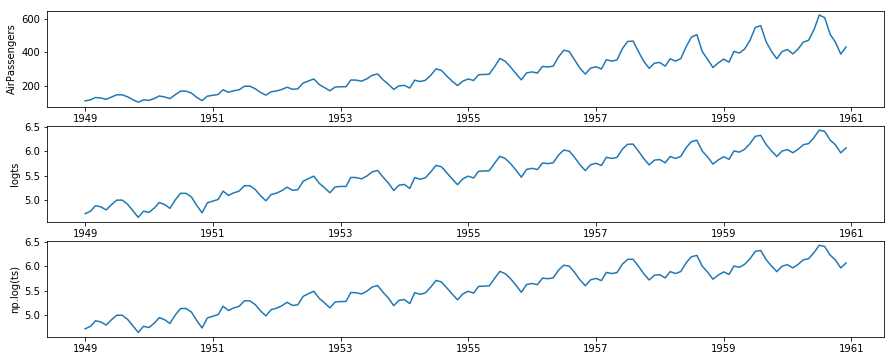

In [73]:
logts=sp.stats.boxcox(ts,lmbda=0) 
logts = pd.DataFrame(logts).set_index(ts.index)
plt.subplot(3, 1, 1)
plt.plot(ts)
plt.ylabel('AirPassengers') 
plt.subplot(3, 1, 2)
plt.plot(logts)
plt.ylabel('logts') 
plt.subplot(3, 1, 3)
plt.plot(np.log(ts))
plt.ylabel('np.log(ts)') 

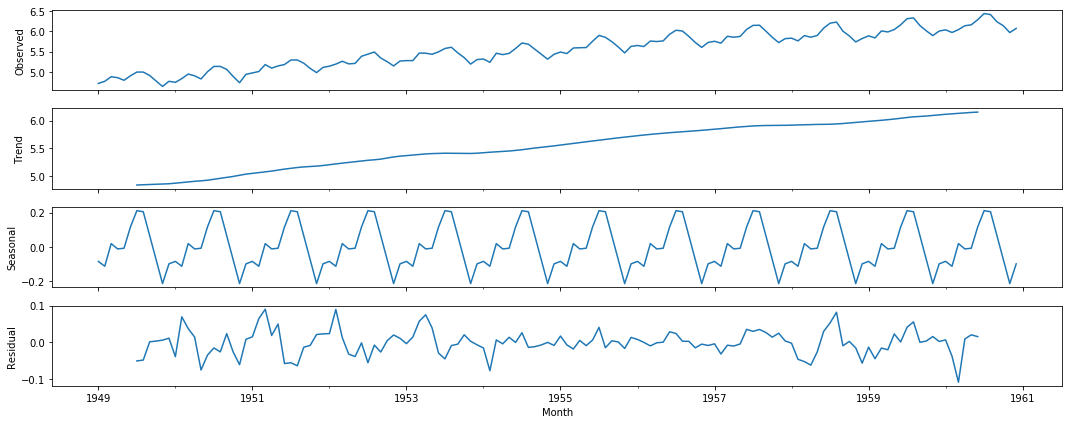

In [61]:
#Descomposición usando promedios Móviles
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(logts, model='additive')
result.plot()
pyplot.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


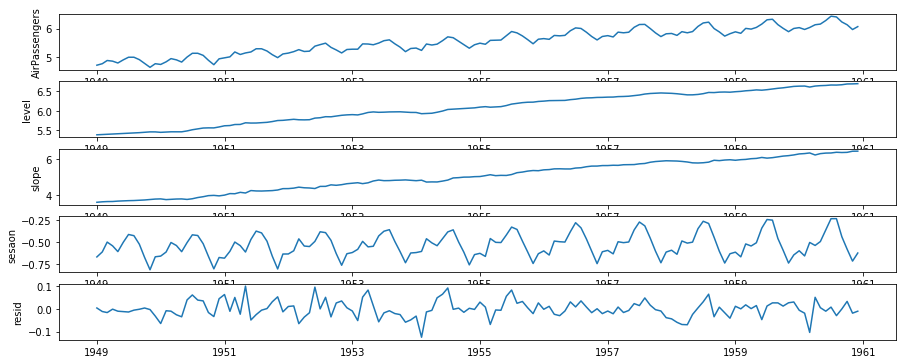

In [71]:
#Descomposición usando suavizamiento exponencial(Holter-Winters )
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fit1 = ExponentialSmoothing(logts, seasonal_periods=12, trend='add', seasonal='add').fit(use_boxcox=True)
plt.subplot(5, 1, 1)
plt.plot(logts)
plt.ylabel('log AirPassengers') 
plt.subplot(5, 1, 2)
plt.plot(fit1.level)
plt.ylabel('level') 
plt.subplot(5, 1, 3)
plt.plot(fit1.slope)
plt.ylabel('slope') 
plt.subplot(5, 1, 4)
plt.plot(fit1.season)
plt.ylabel('sesaon') 
plt.subplot(5, 1, 5)
plt.plot(fit1.resid)
plt.ylabel('resid') 
pyplot.show()

Text(0,0.5,'Estacionalidad')

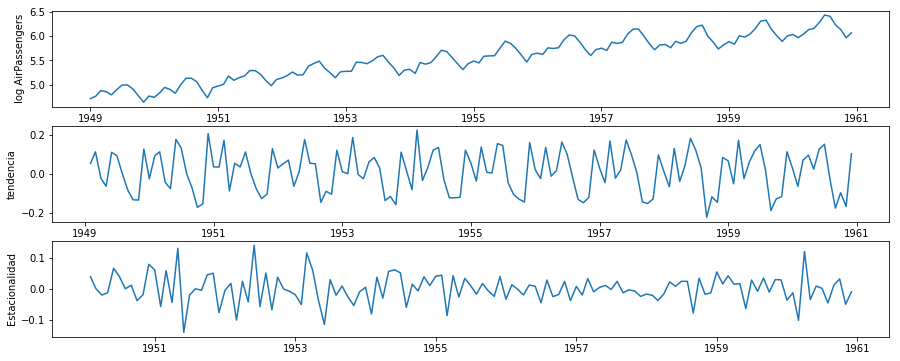

In [74]:
#Eliminación de la tendencia y estacionalidad usando diferenciación
logdts=logts.diff(periods=1)[1:] #Remueve tendencia
logDdts=logdts.diff(periods=12)[12:] #Remueve estacionariedad
plt.subplot(3, 1, 1)
plt.plot(logts)
plt.ylabel('log AirPassengers') 
plt.subplot(3, 1, 2)
plt.plot(logdts)
plt.ylabel('tendencia') 
plt.subplot(3, 1, 3)
plt.plot(logDdts)
plt.ylabel('Estacionalidad') 